Epoch: 0 and loss: 14.210443496704102
Epoch: 10 and loss: 6.32877254486084
Epoch: 20 and loss: 3.3820300102233887
Epoch: 30 and loss: 1.403326153755188
Epoch: 40 and loss: 1.46120285987854
Epoch: 50 and loss: 1.3232299089431763
Epoch: 60 and loss: 1.207252860069275
Epoch: 70 and loss: 1.1255215406417847
Epoch: 80 and loss: 1.063152551651001
Epoch: 90 and loss: 1.013340950012207
Epoch: 100 and loss: 0.9708542227745056
Epoch: 110 and loss: 0.933152973651886
Epoch: 120 and loss: 0.9008835554122925
Epoch: 130 and loss: 0.8725181221961975
Epoch: 140 and loss: 0.8470633625984192
Epoch: 150 and loss: 0.8254294395446777
Epoch: 160 and loss: 0.8066366314888
Epoch: 170 and loss: 0.7898575663566589
Epoch: 180 and loss: 0.7754290699958801
Epoch: 190 and loss: 0.7628031373023987
1.) tensor([-3.0760, -1.7527, -2.4821]) 	 1 	1
2.) tensor([-3.1162, -0.8824, -2.0455]) 	 1 	1
3.) tensor([-3.9551, -4.6060, -4.6076]) 	 0 	0
4.) tensor([-3.9780, -3.2653, -3.8347]) 	 2 	1
5.) tensor([-3.3053, -2.4497, -2.79

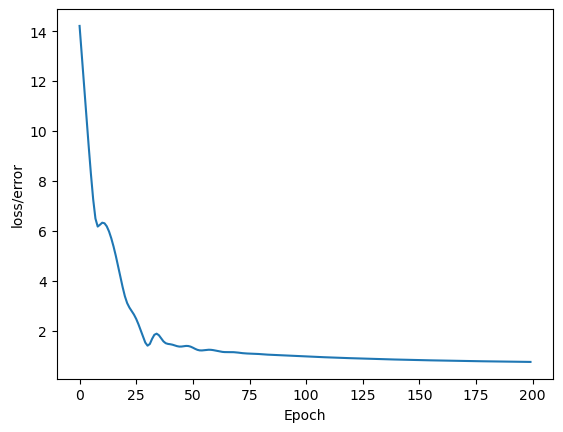

In [474]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#Create a Model Class that inherits nn.module
class Model(nn.Module):
    def __init__(self, in_features=13, h1=13, h2=14, out_features=3):
        super().__init__() #instantitate our nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2) 
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

#Pick a manual seed for randomization
torch.manual_seed(32)
#Create an instance of model
model = Model()

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv'
my_df = pd.read_csv(url)

my_df['Wine'] = my_df['Wine'].replace(1, 0)
my_df['Wine'] = my_df['Wine'].replace(2, 1)
my_df['Wine'] = my_df['Wine'].replace(3, 2)

# Train Test Split Set X y
X = my_df.drop('Wine', axis=1)
y = my_df['Wine']

X = X.values
y = y.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

#Convert X features to Float Tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

#Convert Y features to int Tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# To measure the error
criterion = nn.CrossEntropyLoss()
#Choosing optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

#Train our model
epochs = 200
losses = []
for i in range(epochs):
    #Go forward and get a prediction
    y_pred = model.forward(X_train) # Get predicted results
    # measure the loss/error
    loss = criterion(y_pred, y_train)

    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')

    #Do some back propagtion : take the error rate of forward propagation and feed it back
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

with torch.no_grad(): #Turning off back propagation
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

loss

correct = 0
with torch.no_grad():
    for i ,data in enumerate(X_test):
        y_val = model.forward(data)

        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t{y_val.argmax().item()}')

        if y_val.argmax().item() == y_test[i]:
            correct = correct + 1

print(f'Testing data correctly answered : {correct}')